In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [3]:
df_index

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# dropping unnessasary columns:
df_index.drop(columns = ["Unnamed: 0", "year" ,"month" ],axis=1,inplace=True)

In [6]:
df_index.head()  # Now we have independent and dependent feature 

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
#check null values
df_index.isnull().sum() # so we don't have any null values

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

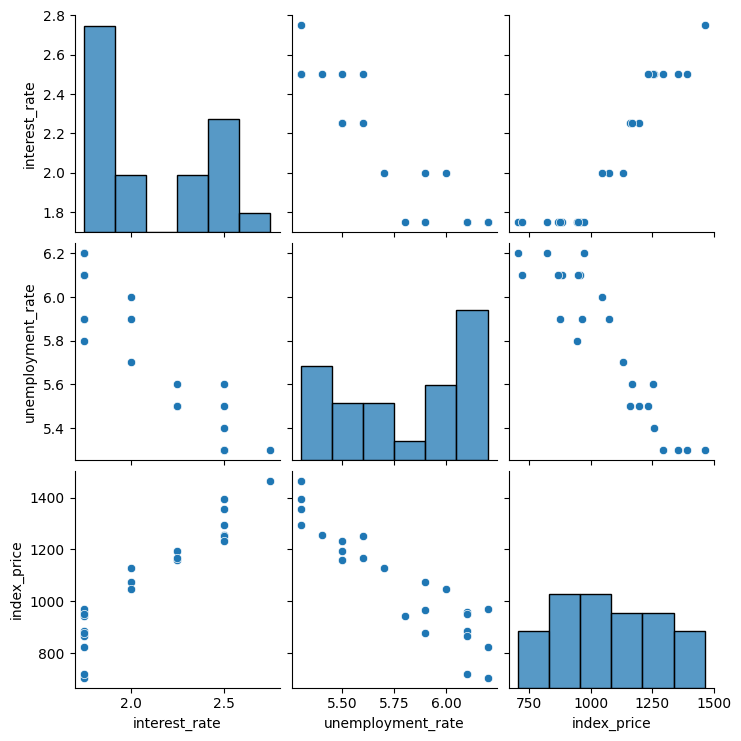

In [8]:
#Lets do some vizualization 
import seaborn as sns
sns.pairplot(df_index)


In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemplyment Rate')

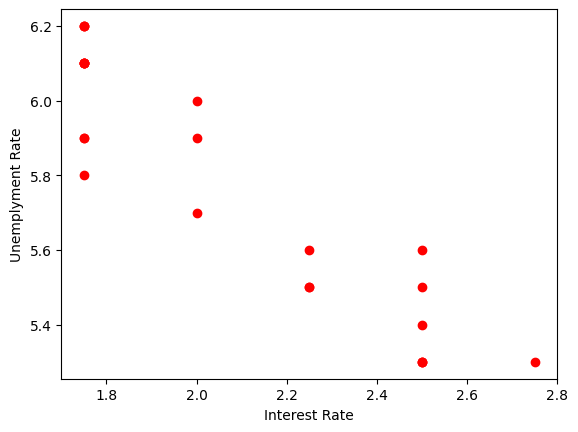

In [10]:
#visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color = "r")
plt.xlabel('Interest Rate')
plt.ylabel("Unemplyment Rate")

In [11]:
#independent and dependent feature
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]


In [12]:
X.head(),y

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [13]:
#Train ,Test Split
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

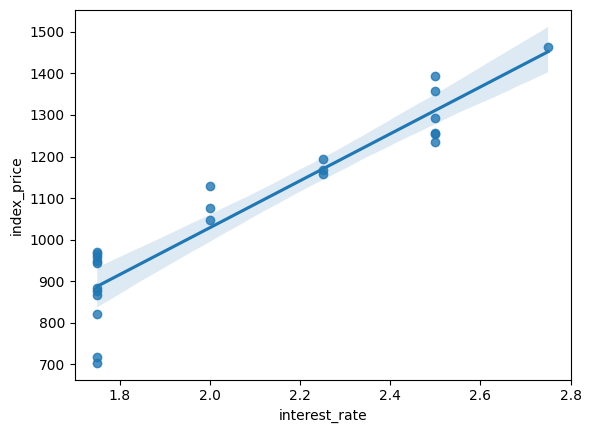

In [14]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price', data=df_index)

# With the help of this we can conclude that our linear regression model will be accurate

In [15]:
from sklearn.preprocessing import StandardScaler


In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [19]:
regression.fit(X_train,y_train)

LinearRegression()

In [20]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv=3)

In [21]:
np.mean(validation_score)

-5914.828180162388

In [22]:
## prediction
y_predict = regression.predict(X_test)


In [23]:
y_predict

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [24]:
## Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = np.sqrt(mse)


In [26]:
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [27]:
# R^2

from sklearn.metrics import r2_score

In [28]:
score = r2_score(y_test,y_predict)
print(score)

0.7591371539010257


In [29]:
# Adjusted R^2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1] -1)

0.5985619231683761

## Assumption


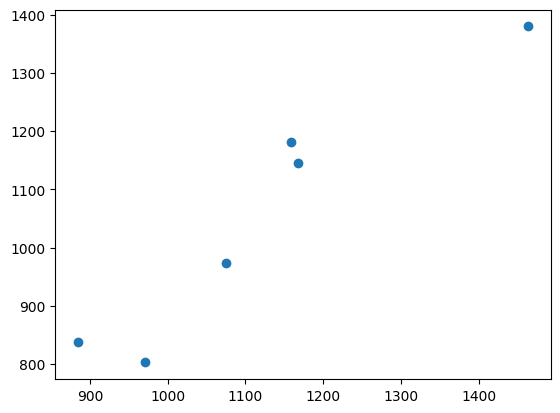

In [30]:
plt.scatter(y_test,y_predict)

In [31]:
residuals = y_test-y_predict
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


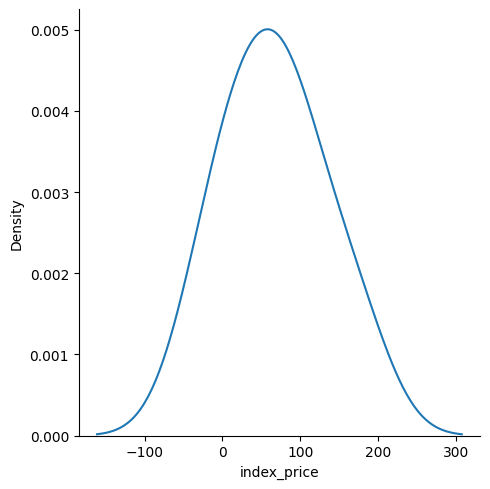

In [32]:
sns.displot(residuals , kind ='kde')

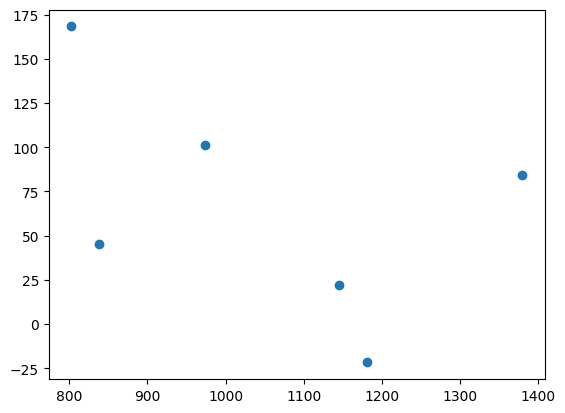

In [33]:
# Scatter ploe wrt prediction and residuals

plt.scatter(y_predict,residuals) # If this plot is uniformly distributed then there is no issue in our model

In [34]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [35]:
#OLS linear regression
!pip install statsmodels





[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()

In [37]:
model.summary()

c:\Users\anshu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 28 Oct 2025   Prob (F-statistic):                       0.754
Time:                        17:56:56   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""